# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import json
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [61]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Convert city names to title case (for dataframe styling)
cities = [city.title() for city in cities]

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 653


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [62]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define units for Temperature
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.date.fromtimestamp(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print(city_url)

    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Nouadhibou
https://api.openweathermap.org/data/2.5/weather?appid=f45bf68743aef53e273fbb41b6229fb5&units=metric&q=Nouadhibou
Processing Record 2 of Set 1 | Vaini
https://api.openweathermap.org/data/2.5/weather?appid=f45bf68743aef53e273fbb41b6229fb5&units=metric&q=Vaini
Processing Record 3 of Set 1 | Talnakh
https://api.openweathermap.org/data/2.5/weather?appid=f45bf68743aef53e273fbb41b6229fb5&units=metric&q=Talnakh
Processing Record 4 of Set 1 | Yueyang
https://api.openweathermap.org/data/2.5/weather?appid=f45bf68743aef53e273fbb41b6229fb5&units=metric&q=Yueyang
Processing Record 5 of Set 1 | Rikitea
https://api.openweathermap.org/data/2.5/weather?appid=f45bf68743aef53e273fbb41b6229fb5&units=metric&q=Rikitea
Processing Record 6 of Set 1 | Moranbah
https://api.openweathermap.org/data/2.5/weather?appid=f45bf68743aef53e273fbb41b6229fb5&units=metric&q=Moranbah
Processing Record 7 of Set 1 | Saint-Phili

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.9310,-17.0347,20.62,66,0,8.51,MR,2023-04-01
1,Vaini,-21.2000,-175.2000,30.09,74,40,6.17,TO,2023-04-01
2,Talnakh,69.4865,88.3972,-5.44,95,100,7.44,RU,2023-04-01
3,Yueyang,29.3333,113.0919,22.39,58,46,3.30,CN,2023-04-01
4,Rikitea,-23.1203,-134.9692,26.89,80,26,7.10,PF,2023-04-01


In [66]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [67]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Nouadhibou,20.9310,-17.0347,20.62,66,0,8.51,MR,2023-04-01
1,Vaini,-21.2000,-175.2000,30.09,74,40,6.17,TO,2023-04-01
2,Talnakh,69.4865,88.3972,-5.44,95,100,7.44,RU,2023-04-01
3,Yueyang,29.3333,113.0919,22.39,58,46,3.30,CN,2023-04-01
4,Rikitea,-23.1203,-134.9692,26.89,80,26,7.10,PF,2023-04-01


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

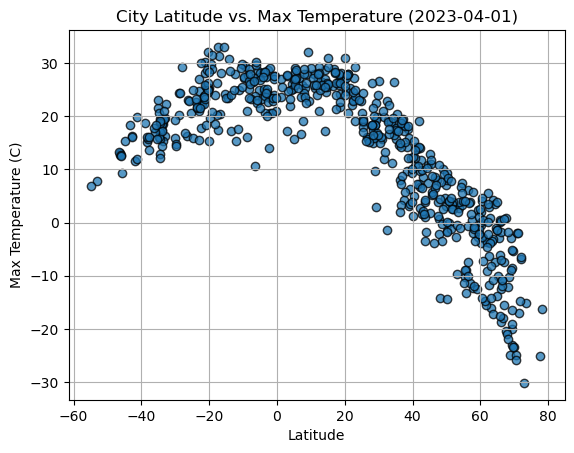

In [102]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. Max Temperature (2023-04-01)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

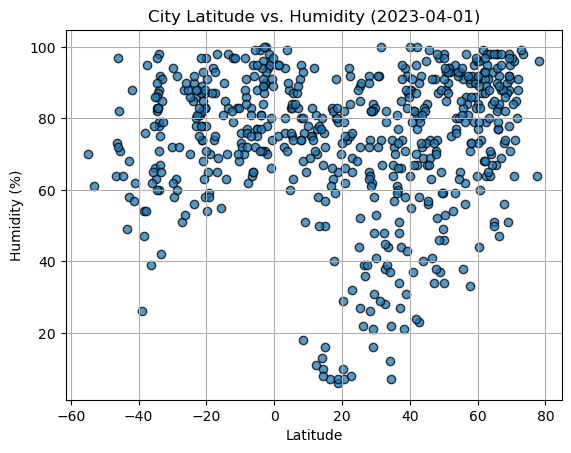

In [103]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("City Latitude vs. Humidity (2023-04-01)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

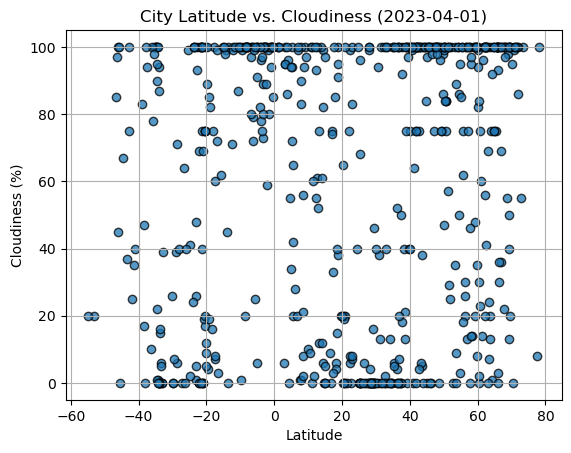

In [104]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("City Latitude vs. Cloudiness (2023-04-01)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

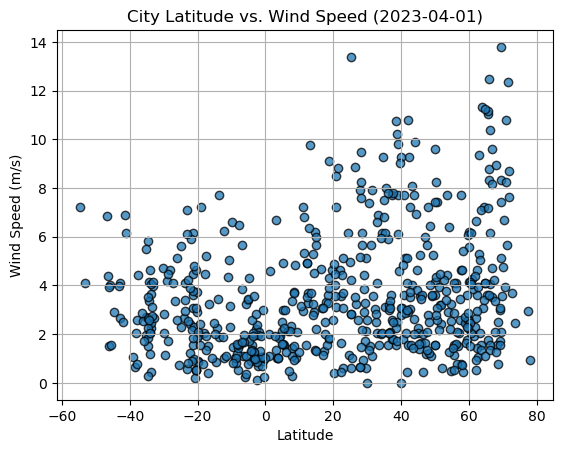

In [105]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("City Latitude vs. Wind Speed (2023-04-01)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))






In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Nouadhibou,20.9310,-17.0347,20.62,66,0,8.51,MR,2023-04-01
2,Talnakh,69.4865,88.3972,-5.44,95,100,7.44,RU,2023-04-01
3,Yueyang,29.3333,113.0919,22.39,58,46,3.30,CN,2023-04-01
7,Qaanaaq,77.4840,-69.3632,-25.13,64,8,2.97,GL,2023-04-01
8,Kapaa,22.0752,-159.3190,22.18,94,75,4.63,US,2023-04-01


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Vaini,-21.2000,-175.2000,30.09,74,40,6.17,TO,2023-04-01
4,Rikitea,-23.1203,-134.9692,26.89,80,26,7.10,PF,2023-04-01
5,Moranbah,-22.0016,148.0466,22.63,81,100,5.92,AU,2023-04-01
6,Saint-Philippe,-21.3585,55.7679,23.77,82,100,4.47,RE,2023-04-01
9,Punta Arenas,-53.1500,-70.9167,7.84,61,20,4.12,CL,2023-04-01


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9034754994812402


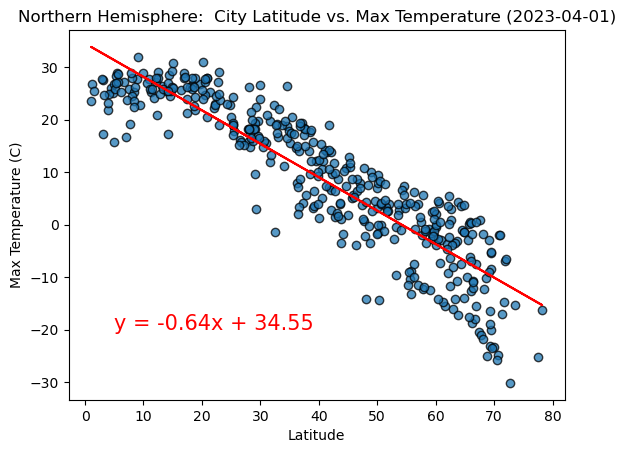

In [118]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (5, -20) ,fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Northern Hemisphere:  City Latitude vs. Max Temperature (2023-04-01)")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.6479018344556553


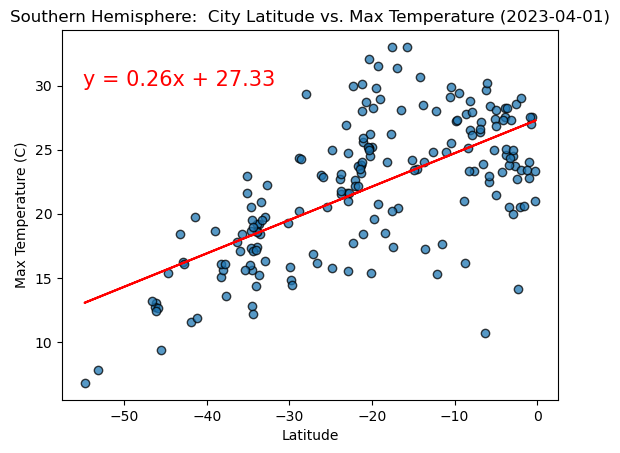

In [117]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55, 30) ,fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Southern Hemisphere:  City Latitude vs. Max Temperature (2023-04-01)")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2693049569682831


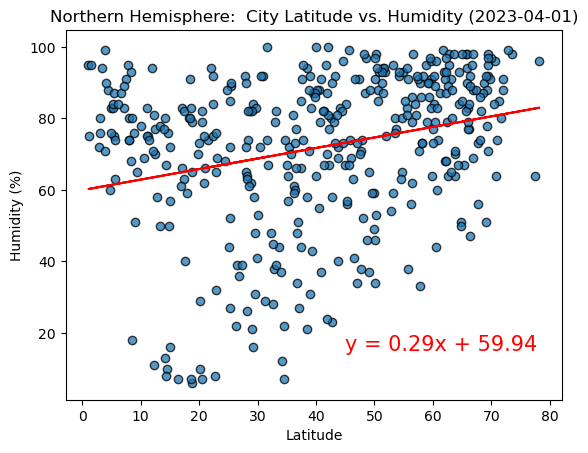

In [121]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (45, 15) ,fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere:  City Latitude vs. Humidity (2023-04-01)")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.3529249539337788


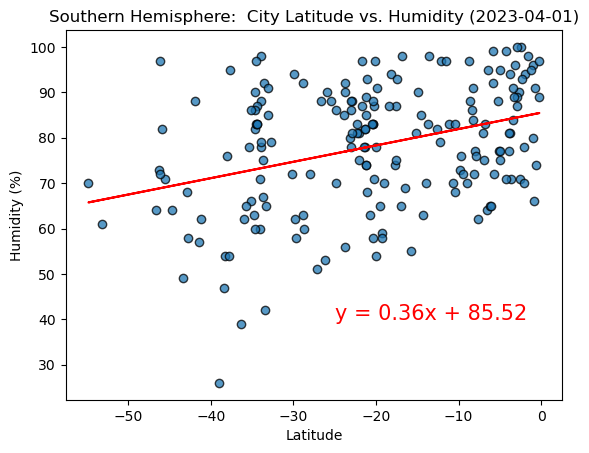

In [124]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-25, 40) ,fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere:  City Latitude vs. Humidity (2023-04-01)")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23212153580182054


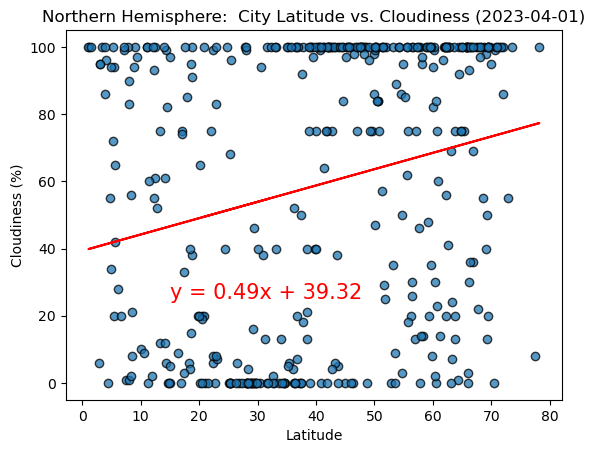

In [127]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (15, 25) ,fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere:  City Latitude vs. Cloudiness (2023-04-01)")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.40230108483924376


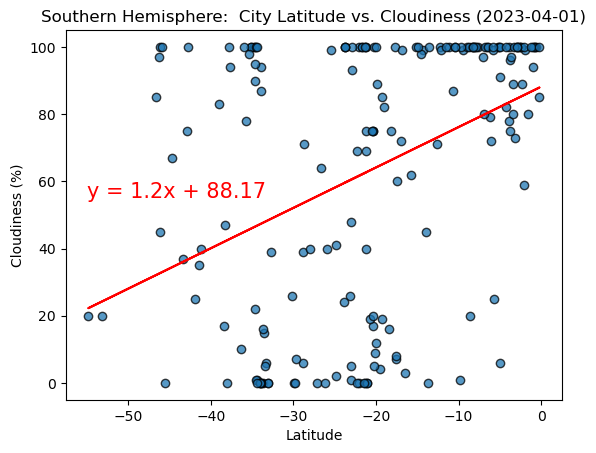

In [129]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55, 55) ,fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere:  City Latitude vs. Cloudiness (2023-04-01)")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.16260201924125103


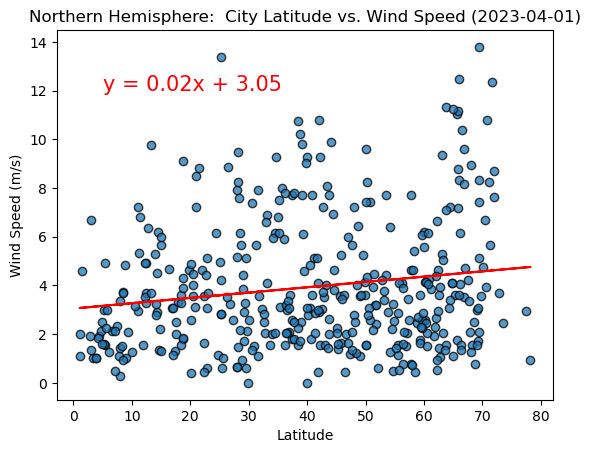

In [136]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (5, 12) ,fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere:  City Latitude vs. Wind Speed (2023-04-01)")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.32718671713694414


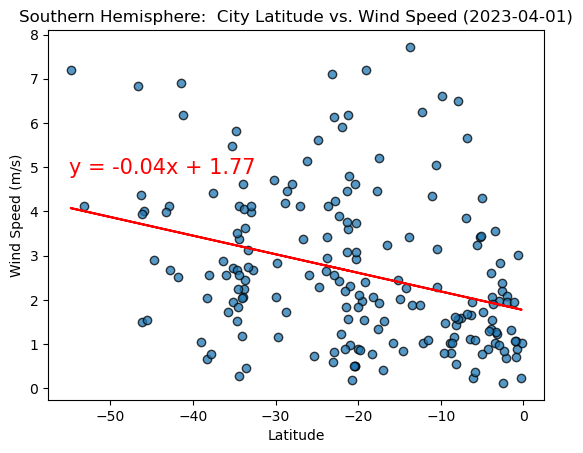

In [139]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha=0.75, edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-55, 4.85) ,fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere:  City Latitude vs. Wind Speed (2023-04-01)")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE